Defaulting to user installation because normal site-packages is not writeable


C:\Users\JIBAK\AppData\Local\Temp\ipykernel_24160\3997394102.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JIBAK\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


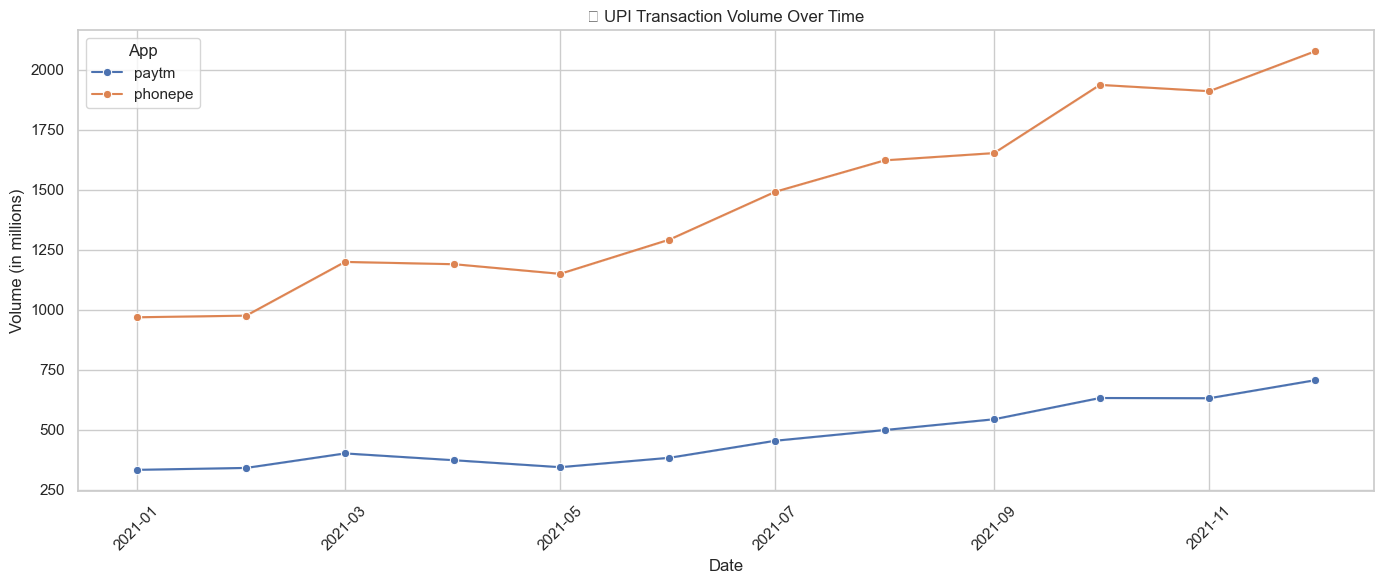

C:\Users\JIBAK\AppData\Local\Temp\ipykernel_24160\3997394102.py:53: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JIBAK\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


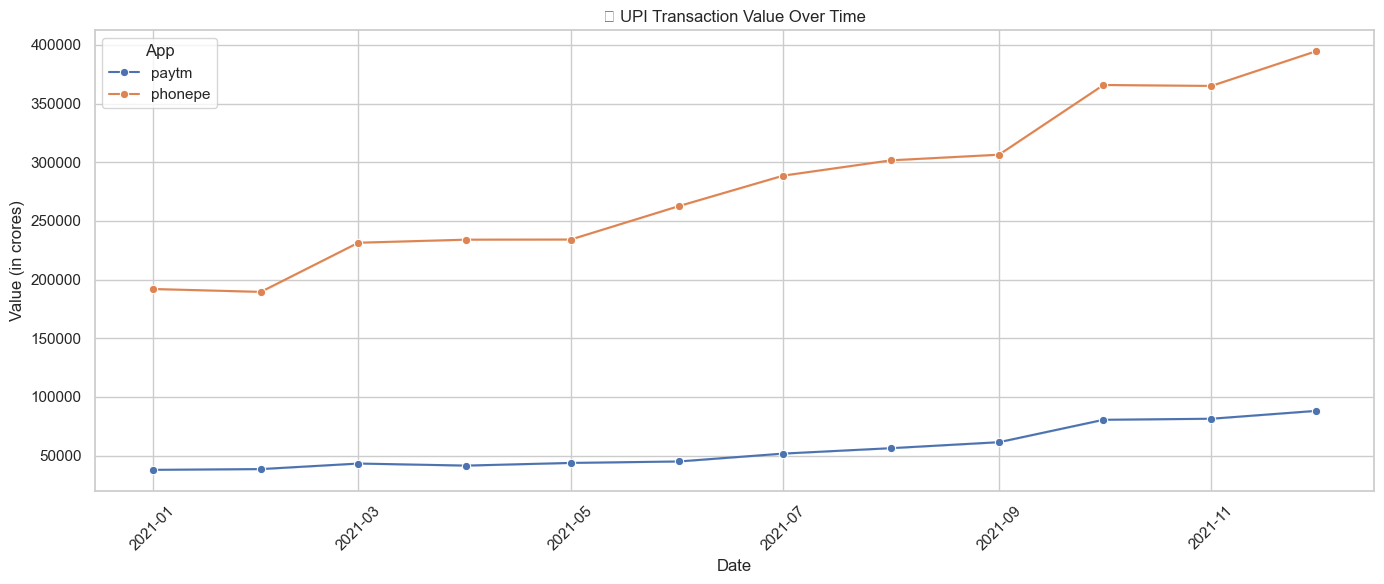

C:\Users\JIBAK\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


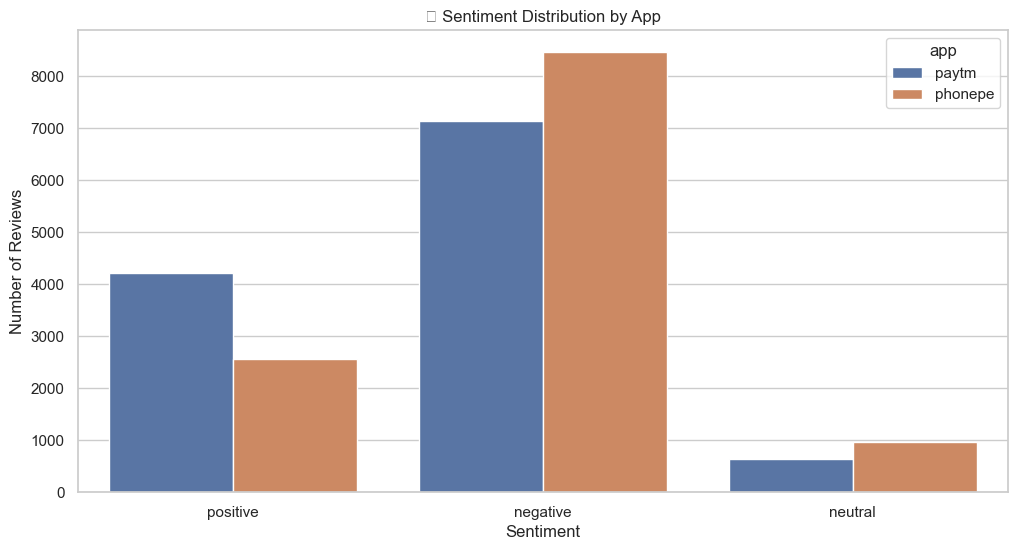

C:\Users\JIBAK\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JIBAK\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


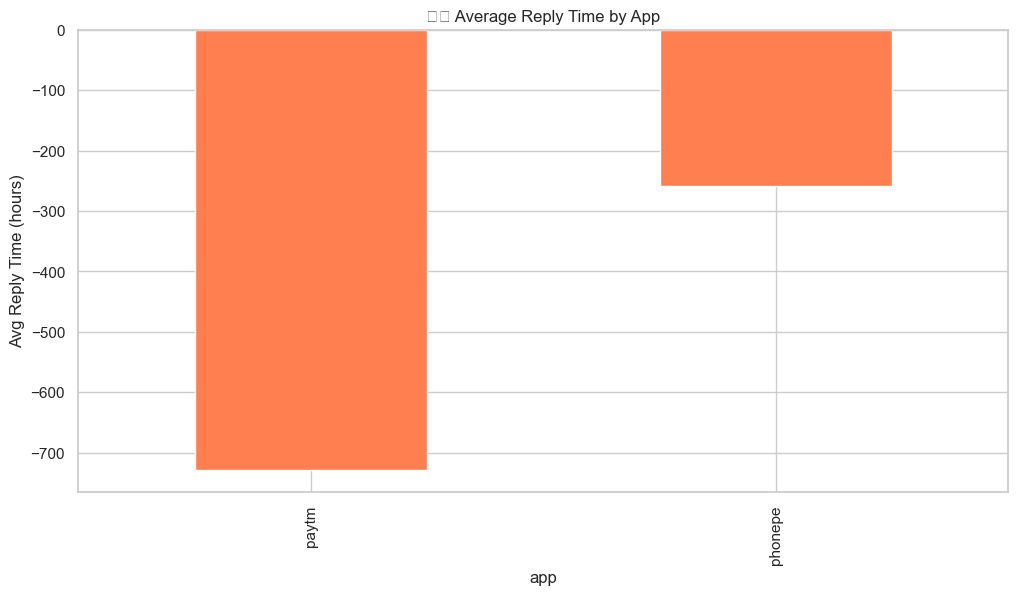

In [5]:
# ---------------------------------------------
# 📌 Step 1: Import Libraries and Load Data
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import datetime

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv(r"C:\Users\JIBAK\Downloads\final_paytm_phonepe_cleaned.csv")

# ---------------------------------------------
# 📌 Step 2: Preprocessing
# ---------------------------------------------
df['at'] = pd.to_datetime(df['at'])
df['repliedAt'] = pd.to_datetime(df['repliedAt'])
df['date'] = pd.to_datetime(df['date'])

# Sentiment from score
df['sentiment'] = df['score'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

# Reply time in hours
df['reply_time_hr'] = (df['repliedAt'] - df['at']).dt.total_seconds() / 3600

# ---------------------------------------------
# 📊 Step 3: Transaction Trend Over Time
# ---------------------------------------------
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='volume_(mn)', hue='app', marker="o")
plt.title('📈 UPI Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in millions)')
plt.legend(title='App')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 💸 Step 4: Value Trend Over Time
# ---------------------------------------------
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='value_(cr)', hue='app', marker="o")
plt.title('💸 UPI Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value (in crores)')
plt.legend(title='App')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 😀 Step 5: Sentiment Distribution
# ---------------------------------------------
sns.countplot(data=df, x='sentiment', hue='app')
plt.title("📊 Sentiment Distribution by App")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()



# ---------------------------------------------
# ⏱️ Step 9: Average Reply Time Analysis
# ---------------------------------------------
avg_reply = df.groupby('app')['reply_time_hr'].mean().dropna()
avg_reply.plot(kind='bar', color='coral')
plt.ylabel("Avg Reply Time (hours)")
plt.title("⏱️ Average Reply Time by App")
plt.show()
